In [139]:
import pandas as pd
import numpy as np
import scipy as sp 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [140]:
data = pd.read_csv("LoanStats3c.csv")


# Data Cleaning

### Data description and corresponding usage

* id - keep (no analysis)

* member_id - keep (no analysis)

* loan_amnt - relevant

* funded_amnt  - relevant but nearly same as loan_amnt (see correlation matrix) - try to create a new feature

* funded_amnt_inv - almost same as funded_amnt ( can be removed)

* term - 36 or 60 - (changes made -Kaustubh **this can give the algorithm the idea of whether shorter loans are better or longer ones**)

* int_rate - relevant (can vary as a function of risk of the corresponding loan)

* installment - (very relevant)takes in account the term factor and loan_amnt together - we can remove 'term' column - but we should not remove loan_amnt because it gives the information about how big a loan is ? . 

* grade - LC determined value (grading scheme not clear) (changes made- Abhinav *** this has high corelation with int_rates as seen from data and lending club site https://www.lendingclub.com/public/rates-and-fees.action . This can be removed***)

* sub_grade - LC determined value (grading scheme not clear) * grade - LC determined value (grading scheme not clear) (changes made- Abhinav *** this has high corelation with int_rates as seen from data and lending club site https://www.lendingclub.com/public/rates-and-fees.action . This can be removed***)


* emp_title - Not relevant (since it does not gives us information about the financial condition of the borrower) (changes made- Abhinav *** We will try to add this feature and see the accuracy on our model***)

* emp_length - does provide information about the credibility of the borrower (needs cleaning - use regular expressions)

* home_ownership - relevant (provides information about the financial condition and other collateral the borrower has)

* annual_inc - very relevant (if the annual income of the borrower is not greater than the annual installments needs to be paid then its a bad loan)

* verification_status - relevant (we can provide a value corresponding to each factor or let the algorithm decide these values

* issue_d - irrelevant (does not provide any information about anything)

* loan_status - LABEL (Current loans needs to be removed)

* pymnt_plan - relevant(may add some information )

* url - irrelevant

* desc - relevant (may provide information about the intensions or behavior of the borrower) - Needs to remove NaN by some value

* purpose - relevant 

* title - same as purpose (remove either)

* zip_code - not relevant (can be replaced by the addr_state )

* dti - very relevant (debt to income ratio) - can think of removing income and loan_amnt for once

* delinq_2yrs - relevant (in terms of frequency)

* earlies_cr_line - relevant (can remove the month -year is relevant)

* inq_last_6mths - relevant inquiries ragarding loans in last 6 months 

* mths_since_last_delinq - relevant (need to deal with missing values)

* mths_since_last_record - relevant (need to deal with missing values)

* open_acc - relevant (open credit lines)

* pub_rec - relevant (negative factor)

* revol_bal - relevant (may be correlated to the amount of credit)

* total_acc - relevant (total number of credit lines currently in borrower's credit file )

* initial_list_status - relevant (initial listing status of loan ) (W,F -meaning not known till now)( changes made-Abhinav *** w means whole loan and f means fractional loan. This is weather investor as invested whole money or partly in the loan . This does not give any idea about the loan taker so can be removed***)

* out_prncp - relevant 

* total_pymnt - relevant but correlated to out_prncp (see correlation)

* total_pymnt_inv - nearly same as total_pymnt (see similarity)

* total_rec_prncp - principal recieved till date (relevant)

* total_rec_late_fee - late fees recieved to date (relevance to be decided )

* total_rec_int - interest recieved till date

* recoveries - post charge off gross recovery (to be decided)

* collection_recovery_fee - post charge off collection fee () 

* last_pymnt_d - may be relevant

* last_pymnt_amnt - may be relevant

* next_pymnt_d - may be relevant

* last_credit_pull_d - The most recent month LC pulled credit for this loan ( may or may not be relevant)

* collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections (relevant)

* mths_since_last_major_derog - Months since most recent 90-day or worse rating **find out the meaning** and then decide relevance

* policy_code - relevant (1 or 2) -decided according to the FICO scores

* application_type - individual or joint ( may be relevant)

* annual_inc_joint - relevant (but have lots of missing values for individual accounts)

* dti_joint - same case as above

* verification_status_joint - same as above

* acc_now_delinq - the number of accounts on which the borrower is now delinquent (relevant)

* tot_coll_amt - total collection amounts ever owed (relevant)

* tot_cur_bal - total current balance of all accounts (relevant) - try to make a new feature 

* open_acc_6m - Number of open trades in the last 6 months (many NaN values to deal with)

* open_il_6m - Number of currently active installment trades (lot of NaN values)

* open_il_12m - Number of installment accounts opened in past 12 months

* open_il_24m - Number of installment accounts opened in past 24 months

* mths_since_rcnt_il - months since most recent installment accounts openend 

* total_bal_il - total current balance of all installment accounts

* il_util - relevant (deal with NaNs) (ratio of total current balaance to high creditt/credit limit on all install acct

* open_rv_12m - Number of revolving trades in past 12 months (may or may not be )

* open_rv_24m - in past 24 months (Same)

* max_bal_bc - Maximum current balance owed on all revolving accounts (relevant) NaNs

* all_util - Balance to credit limit on all trades (relevant but NaNs)

* total_credit_rv - Total credit line on open revolving accounts (very relevant) -Try to create a new feature vector

* inq_fi - Number of personal finance inquiries (Lot of NaNs (scrutiny)

* total_fi_tl - Number of finance trades (may or may not be) (Lot of NaNs)

* inq_last_12m -Number of credit inquiries in past 12 months (Lot of NaNs) (scrutiny)

### First we need to remove the Current loans

In [141]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_credit_rv,inq_fi,total_fi_tl,inq_last_12m
0,36805548,39558264,10400,10400,10400,36 months,6.99%,321.08,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,19400,NaN,NaN,NaN
1,38098114,40860827,15000,15000,15000,60 months,12.39%,336.64,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,184500,NaN,NaN,NaN
2,37612354,40375473,12800,12800,12800,60 months,17.14%,319.08,D,D4,...,NaN,NaN,NaN,NaN,NaN,NaN,5700,NaN,NaN,NaN
3,37822187,40585251,9600,9600,9600,36 months,13.66%,326.53,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,27600,NaN,NaN,NaN
4,37842129,40605224,21425,21425,21425,60 months,15.59%,516.36,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,21500,NaN,NaN,NaN


In [142]:
data.loan_status.value_counts()

Current               162337
Fully Paid             52023
Charged Off            13350
Late (31-120 days)      4974
In Grace Period         1928
Late (16-30 days)        783
Default                  234
dtype: int64

### Removing the Current loans

In [143]:
df = data[-(data.loan_status == 'Current')]

### Removing NaN values

In [144]:
df = df[-df.loan_status.isnull()]

In [145]:
df.loan_status.value_counts()

Fully Paid            52023
Charged Off           13350
Late (31-120 days)     4974
In Grace Period        1928
Late (16-30 days)       783
Default                 234
dtype: int64

In [146]:
sum(df.loan_status == 'In Grace Period')

1928

### Removing the "In Grace Period" Loans

These loans will not help us in classifying new loan as bad or good 

In [147]:
df = df[-(data.loan_status == 'In Grace Period')]

In [148]:
len(df.loan_status)

71364

## Kaustubh - I am adding this snippet which will calculate the number of "null" values in each column

In [149]:
missing = []

for col in df.columns:
    missing.append(sum(df[col].isnull()))
    #print col + " " + " -- " + " " + str(sum(df[col].isnull()))



## I am going to add this column to a new data frame "null" under "missing" row



In [150]:
colu = list(df.columns)

missing = np.array(missing)

missing = missing.reshape(1,-1)

null = pd.DataFrame(data = missing,columns = colu)

## So that at any point of time we can simply write the following to find out the number of missing values in the column

In [151]:
null.desc


0    65340
Name: desc, dtype: int64

### Giving Binary values to the loan_status variable which classifies them as good(1) or bad(0) loan

In [152]:
Label = []

for status in df.loan_status:
    if status == "Fully Paid":
        status = 1
        Label.append(status)
    else:
        status = 0
        Label.append(status)
        
        

In [153]:
df.loan_status = Label

In [154]:
df.loan_status.value_counts()

1    52023
0    19341
dtype: int64

In [155]:
df.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_credit_rv,inq_fi,total_fi_tl,inq_last_12m
member_id,1.000000,-0.026698,-0.026698,-0.026478,-0.040536,-0.008128,-0.024568,0.064463,-0.000418,-0.085196,...,NaN,NaN,NaN,NaN,NaN,NaN,0.026991,NaN,NaN,NaN
loan_amnt,-0.026698,1.000000,1.000000,0.999997,0.954410,0.410343,-0.061475,0.019603,-0.000564,-0.010466,...,NaN,NaN,NaN,NaN,NaN,NaN,0.362353,NaN,NaN,NaN
funded_amnt,-0.026698,1.000000,1.000000,0.999997,0.954410,0.410343,-0.061475,0.019603,-0.000564,-0.010466,...,NaN,NaN,NaN,NaN,NaN,NaN,0.362353,NaN,NaN,NaN
funded_amnt_inv,-0.026478,0.999997,0.999997,1.000000,0.954396,0.410374,-0.061480,0.019575,-0.000588,-0.010487,...,NaN,NaN,NaN,NaN,NaN,NaN,0.362353,NaN,NaN,NaN
installment,-0.040536,0.954410,0.954410,0.954396,1.000000,0.407429,-0.049969,0.013022,0.011715,0.012371,...,NaN,NaN,NaN,NaN,NaN,NaN,0.341205,NaN,NaN,NaN
annual_inc,-0.008128,0.410343,0.410343,0.410374,0.407429,1.000000,0.084076,-0.226094,0.052931,0.057332,...,NaN,NaN,NaN,NaN,NaN,NaN,0.337263,NaN,NaN,NaN
loan_status,-0.024568,-0.061475,-0.061475,-0.061480,-0.049969,0.084076,1.000000,-0.156588,-0.036069,-0.038670,...,NaN,NaN,NaN,NaN,NaN,NaN,0.062027,NaN,NaN,NaN
dti,0.064463,0.019603,0.019603,0.019575,0.013022,-0.226094,-0.156588,1.000000,-0.011217,-0.000778,...,NaN,NaN,NaN,NaN,NaN,NaN,0.060749,NaN,NaN,NaN
delinq_2yrs,-0.000418,-0.000564,-0.000564,-0.000588,0.011715,0.052931,-0.036069,-0.011217,1.000000,0.032516,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.047581,NaN,NaN,NaN
inq_last_6mths,-0.085196,-0.010466,-0.010466,-0.010487,0.012371,0.057332,-0.038670,-0.000778,0.032516,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000913,NaN,NaN,NaN


### Since correlation of funded amount and loan amount is 1.00000 we can remove one of them (we'll remove funded_amnt)

In [156]:
clean_data = df #so that we can keep the cleaned data as a back up

In [157]:
df.drop("funded_amnt",1,)

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_credit_rv,inq_fi,total_fi_tl,inq_last_12m
3,37822187,40585251,9600,9600,36 months,13.66%,326.53,C,C3,Admin Specialist,...,NaN,NaN,NaN,NaN,NaN,NaN,27600,NaN,NaN,NaN
5,37662224,40425321,7650,7650,36 months,13.66%,260.20,C,C3,Technical Specialist,...,NaN,NaN,NaN,NaN,NaN,NaN,18300,NaN,NaN,NaN
6,37800722,40563521,12975,12975,36 months,17.86%,468.17,D,D5,Sales,...,NaN,NaN,NaN,NaN,NaN,NaN,15700,NaN,NaN,NaN
11,37741884,40504905,2500,2500,36 months,11.99%,83.03,B,B5,Manufacturing Engineer,...,NaN,NaN,NaN,NaN,NaN,NaN,24300,NaN,NaN,NaN
12,37642222,40405288,5250,5250,36 months,11.44%,172.98,B,B4,Store Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,22000,NaN,NaN,NaN
17,37742142,40505198,2000,2000,36 months,14.99%,69.33,C,C5,practice plan associate,...,NaN,NaN,NaN,NaN,NaN,NaN,15300,NaN,NaN,NaN
24,36109709,38821388,2000,2000,36 months,12.99%,67.38,C,C2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39600,NaN,NaN,NaN
28,37822030,40585070,18450,18450,36 months,14.31%,633.36,C,C4,construction foreman,...,NaN,NaN,NaN,NaN,NaN,NaN,6800,NaN,NaN,NaN
29,37692106,40465191,28000,28000,60 months,10.49%,601.70,B,B3,Humana Cares Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,41700,NaN,NaN,NaN
32,10089665,11941194,8000,8000,36 months,10.49%,259.99,B,B3,Senior Logistics Analyst,...,NaN,NaN,NaN,NaN,NaN,NaN,74700,NaN,NaN,NaN


### Trying to clean emp_length

In [158]:
df.emp_length = df.emp_length.apply(lambda x : x[:-6] if 'years' in x else '<1')

In [159]:
df.emp_length = df.emp_length.astype(object)

In [160]:
df.emp_length

3         10+
5          <1
6         10+
11         <1
12          2
17          8
24         <1
28        10+
29          2
32          3
35        10+
37          5
40          4
50          4
55         <1
56          2
61          4
68          9
69          5
70          7
75         <1
78          2
84          7
85          2
87          2
90        10+
97         <1
103        <1
112       10+
119       10+
         ... 
235558    10+
235559    10+
235561     <1
235563     <1
235564      2
235565    10+
235567    10+
235570    10+
235571     <1
235581    10+
235584      2
235585     <1
235595    10+
235596      4
235598     <1
235599      9
235600     <1
235601    10+
235603      4
235605     <1
235606     <1
235608    10+
235609     <1
235616     <1
235619      7
235620      5
235621      3
235622    10+
235625    10+
235626      3
Name: emp_length, dtype: object

### Removing emp_title, issue_d

In [161]:
columns_to_remove = ['emp_title', 'issue_d', 'url', 'zip_code']

In [162]:
for column in columns_to_remove:
    df = df.drop(column, axis=1)

In [163]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_credit_rv,inq_fi,total_fi_tl,inq_last_12m
3,37822187,40585251,9600,9600,9600,36 months,13.66%,326.53,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,27600,NaN,NaN,NaN
5,37662224,40425321,7650,7650,7650,36 months,13.66%,260.20,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,18300,NaN,NaN,NaN
6,37800722,40563521,12975,12975,12975,36 months,17.86%,468.17,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,15700,NaN,NaN,NaN
11,37741884,40504905,2500,2500,2500,36 months,11.99%,83.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,24300,NaN,NaN,NaN
12,37642222,40405288,5250,5250,5250,36 months,11.44%,172.98,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,22000,NaN,NaN,NaN


In [164]:
df.purpose.describe()

count                  71364
unique                    13
top       debt_consolidation
freq                   44681
Name: purpose, dtype: object

In [165]:
df.title.describe()

count                  71364
unique                  1010
top       Debt consolidation
freq                   43623
Name: title, dtype: object

In [166]:
sum(df.emp_length == 10)

0

In [167]:
df.emp_length.dtype

dtype('O')

In [168]:
sum(df.emp_length.isnull()) # no null values

0

In [169]:
import re #regular expressions (ABhinav dekh le)

In [170]:
emp = []
for i in df.emp_length:
    emp.append(re.sub('[^0-9]', '', i))


In [171]:
df.emp_length = emp

In [172]:
df.emp_length.dtype

dtype('O')

#We need to change the data type to int64

In [173]:
df.emp_length = df.emp_length.astype(int)

In [174]:
df.emp_length.dtype #done

dtype('int64')

In [175]:
df.emp_length.head

<bound method Series.head of 3         10
5          1
6         10
11         1
12         2
17         8
24         1
28        10
29         2
32         3
35        10
37         5
40         4
50         4
55         1
56         2
61         4
68         9
69         5
70         7
75         1
78         2
84         7
85         2
87         2
90        10
97         1
103        1
112       10
119       10
          ..
235558    10
235559    10
235561     1
235563     1
235564     2
235565    10
235567    10
235570    10
235571     1
235581    10
235584     2
235585     1
235595    10
235596     4
235598     1
235599     9
235600     1
235601    10
235603     4
235605     1
235606     1
235608    10
235609     1
235616     1
235619     7
235620     5
235621     3
235622    10
235625    10
235626     3
Name: emp_length, dtype: int64>

In [176]:
df.int_rate.head()


3      13.66%
5      13.66%
6      17.86%
11     11.99%
12     11.44%
Name: int_rate, dtype: object

#Converting the datatype of "int_rate" from object to float64 and removing "%" sign

In [177]:
df.int_rate = [x[:-1] for x in df.int_rate]

In [178]:
df.int_rate.head()

3      13.66
5      13.66
6      17.86
11     11.99
12     11.44
Name: int_rate, dtype: object

In [179]:
df.int_rate = df.int_rate.astype(float)

In [180]:
df.int_rate.describe()

count    71364.000000
mean        14.374701
std          4.429493
min          6.000000
25%         11.670000
50%         13.980000
75%         16.990000
max         26.060000
Name: int_rate, dtype: float64

In [181]:
null.int_rate #so no missing values

0    0
Name: int_rate, dtype: int64

## This plot is showing the mean value of loan_status for a particular home_ownership value

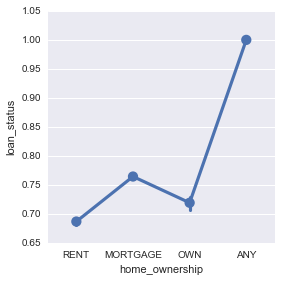

In [182]:
sns.factorplot(x="home_ownership",y="loan_status",data = df)# 'ANY' has only one data point

In [183]:
np.mean(df[df.home_ownership == "OWN"].loan_status)

0.7190546528803545

In [184]:
df.annual_inc.dtype

dtype('float64')

In [185]:
to_remove = []

for i in df.columns:
    if null[i][0] == 71364:
        to_remove.append(i)
        
to_remove

['annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_fi_tl',
 'inq_last_12m']

In [186]:
df1 = df #keeping the version of df as df1

In [187]:
for feature in to_remove:
    df = df.drop(feature,axis = 1)

In [188]:
len(df.columns)

53

In [189]:
for i in df.columns:
    if null[i][0] > 50000:   #These features should also be removed as it'll be difficult to fill these missing values from a regression fitting as the available values are very less and missing values are very large
        print i

desc
mths_since_last_record
next_pymnt_d
mths_since_last_major_derog


### Plotting against total_credit_rv

In [190]:
df.total_credit_rv

3          27600
5          18300
6          15700
11         24300
12         22000
17         15300
24         39600
28          6800
29         41700
32         74700
35         15000
37         66500
40         10400
50         33700
55         21000
56         12600
61         27800
68         26500
69         41400
70         16200
75          1300
78        112400
84         28100
85         23000
87          5000
90         10100
97         20000
103        20300
112        24000
119        29500
           ...  
235558     41300
235559     52300
235561     34000
235563     21300
235564     29300
235565     59700
235567     34100
235570     56500
235571     22500
235581     38600
235584     27100
235585      5300
235595     32000
235596     20100
235598      8200
235599    153800
235600     29300
235601     40800
235603      9200
235605     38100
235606     24400
235608     40200
235609     30800
235616     25400
235619     10500
235620     49800
235621     50300
235622     111

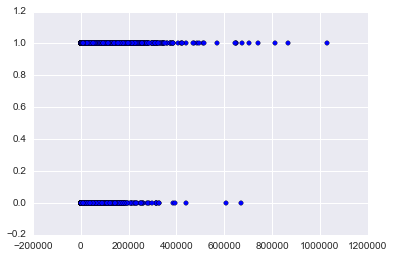

In [191]:
plt.scatter(df.total_credit_rv, df.loan_status)

### Plotting against tot_cur_bal

In [192]:
df.tot_cur_bal

3          38566
5          64426
6          17281
11        397223
12         10133
17         20539
24           744
28        237795
29        239362
32        256696
35        128450
37         59623
40         53901
50         47115
55         15894
56         69669
61         24481
68         15659
69         66967
70         18342
75         51161
78        629294
84        200512
85        230664
87        166080
90          5805
97        318905
103        77421
112        26790
119         7562
           ...  
235558    141512
235559     26409
235561     51830
235563     17755
235564    102722
235565     37886
235567    237415
235570    521411
235571     12587
235581    404265
235584     37638
235585      7226
235595     21265
235596    135047
235598      1199
235599    383345
235600     34157
235601    297745
235603     32971
235605    116175
235606    197078
235608     13021
235609    334899
235616    125641
235619    259863
235620    116995
235621     42592
235622     101

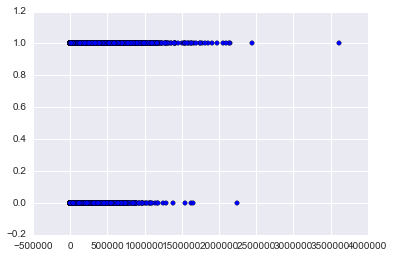

In [193]:
plt.scatter(df.tot_cur_bal, df.loan_status)

### Plotting against tot_coll_amt

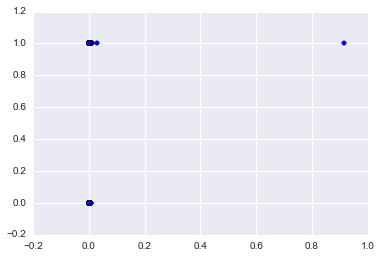

In [194]:
plt.scatter(df.tot_coll_amt/10e6, df.loan_status)

##### The above plot is intersting, Kaustabh take a look

### Plotting against acc_now_delinq

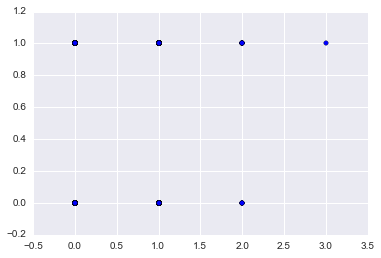

In [195]:
plt.scatter(df.acc_now_delinq, df.loan_status)

#### This shows that if a person has 3 deliquent accounts, then he is definitely 1(good). This is counter intuitive

In [196]:
df.acc_now_delinq[df.acc_now_delinq == 3]

145595    3
Name: acc_now_delinq, dtype: float64

#### But we can see that there is only one person who has 3 deliquencies, so this is an outlier

### Removing application_type

In [197]:
len(df.application_type[df.application_type == 'INDIVIDUAL'])/len(df.application_type)

1

#### We can see that there is only one type of 'application_type', so we can remove it

In [198]:
df = df.drop(['application_type'], axis=1)

### Removing policy_code

In [199]:
df.policy_code.value_counts()

1    71364
dtype: int64

#### We can see that there is only one type of 'policy_code', so we can remove it

In [200]:
df = df.drop(['policy_code'], axis=1)

### Plotting against collections_12_mths_ex_med

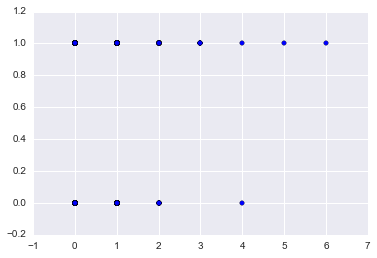

In [201]:
plt.scatter(df.collections_12_mths_ex_med, df.loan_status)

### Plotting against mths_since_last_major_derog  { we'll later remove this column and check whether our accuracy increases ?}    

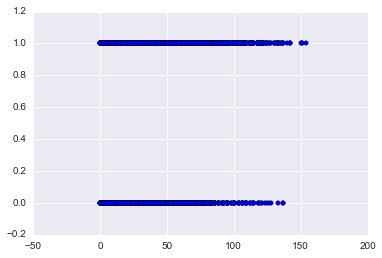

In [202]:
plt.scatter(df.mths_since_last_major_derog , df.loan_status)

### Dealing with last_credit_pull_d

In [203]:
df.last_credit_pull_d

3         Dec-2015
5         Dec-2015
6         Dec-2015
11        Dec-2015
12        Apr-2015
17        Dec-2015
24        Mar-2015
28        Dec-2015
29        Dec-2015
32        Oct-2015
35        Dec-2015
37        Jan-2015
40        Dec-2015
50        Jun-2015
55        Aug-2015
56        May-2015
61        Dec-2015
68        Jun-2015
69        Aug-2015
70        Dec-2015
75        May-2015
78        Nov-2015
84        Nov-2015
85        Dec-2015
87        Apr-2015
90        Dec-2015
97        Dec-2015
103       Nov-2015
112       Mar-2015
119       Dec-2015
            ...   
235558    Nov-2014
235559    Oct-2015
235561    Dec-2015
235563    Dec-2015
235564    Jul-2014
235565    Dec-2015
235567    Dec-2015
235570    Oct-2015
235571    Nov-2015
235581    Mar-2015
235584    Dec-2015
235585    Dec-2015
235595    Dec-2015
235596    Feb-2015
235598    Dec-2015
235599    Aug-2015
235600    Dec-2015
235601    Dec-2015
235603    Dec-2015
235605    Apr-2015
235606    Dec-2015
235608    Se

In [204]:
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d)

#### Someone try to plot this datetime against loan_status

### Dealing with collection_recovery_fee

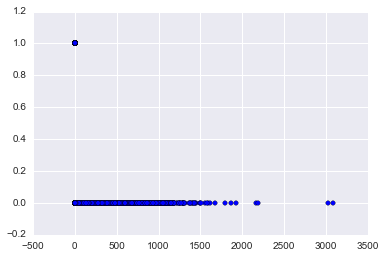

In [205]:
plt.scatter(df.collection_recovery_fee, df.loan_status)

In [206]:
len(df.collection_recovery_fee[df.loan_status == 1][df.collection_recovery_fee == 0])/len(df.collection_recovery_fee[df.loan_status == 1])

1

#### All good people have collection_recovery_fee = 0

### Dealing with recoveries 

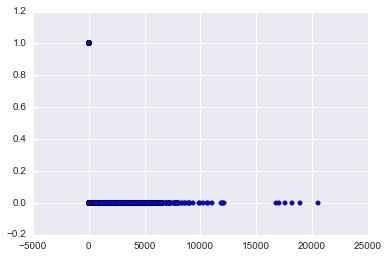

In [207]:
plt.scatter(df.recoveries, df.loan_status)

#### All good people have recoveries = 0

### Plotting against total_rec_int

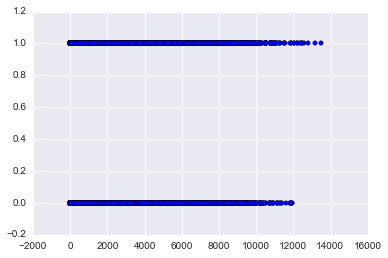

In [208]:
plt.scatter(df.total_rec_int, df.loan_status)

### Plotting against total_rec_late_fee

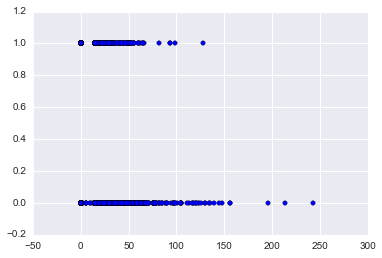

In [209]:
plt.scatter(df.total_rec_late_fee, df.loan_status)

#### We can observe that if total_rec_late_fee is > 140 then the is definetely bad

### Plotting against total_rec_prncp

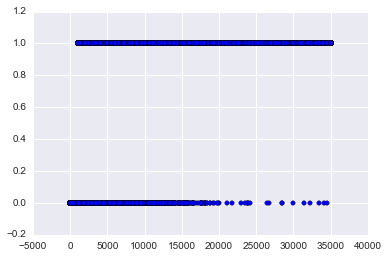

In [210]:
plt.scatter(df.total_rec_prncp, df.loan_status)

### Plotting against total_pymnt_inv & total_pymnt

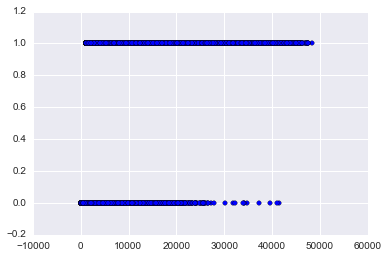

In [211]:
plt.scatter(df.total_pymnt_inv, df.loan_status)

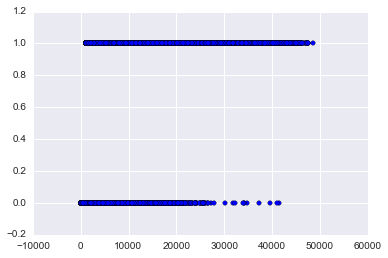

In [212]:
plt.scatter(df.total_pymnt, df.loan_status)

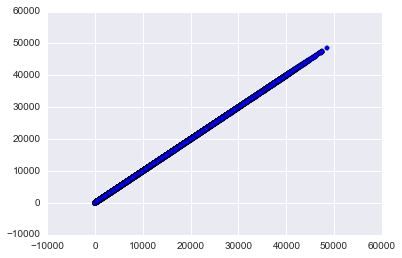

In [213]:
plt.scatter(df.total_pymnt, df.total_pymnt_inv)

#### We can see that there is linear relation between there 2 columns

In [214]:
df.corr()['total_pymnt']['total_pymnt_inv']

0.99999770105624086

#### And this is also supported by correlation also, which is 0.99999

### Plotting against out_prncp

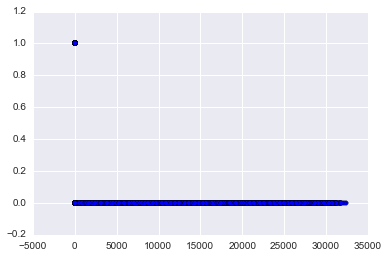

In [215]:
plt.scatter(df.out_prncp, df.loan_status)

###  Plot of loan status v/s states

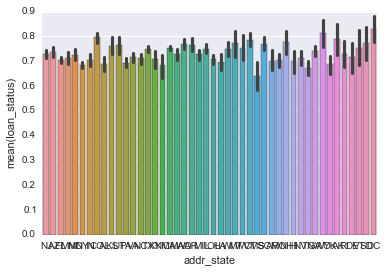

In [216]:
sns.barplot(x="addr_state",y="loan_status",data = df)

### Plot of grades v/s int_rates

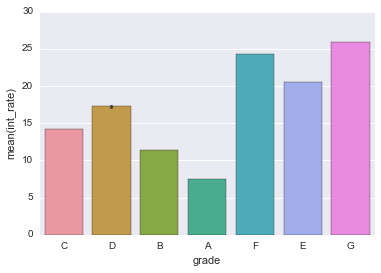

In [217]:
sns.barplot(x="grade",y="int_rate",data = df)

**we see that with increase in grade int_rate also increases so grade and sub grade have high corelation with the int_rates so it can be removed**

In [218]:
df= df.drop(['grade','sub_grade'],1)

In [219]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv
3,37822187,40585251,9600,9600,9600,36 months,13.66,326.53,10,RENT,...,Apr-2015,9338.58,NaN,2015-12-26,0,NaN,0,0,38566,27600
5,37662224,40425321,7650,7650,7650,36 months,13.66,260.20,1,RENT,...,Aug-2015,17.70,NaN,2015-12-26,0,NaN,0,0,64426,18300
6,37800722,40563521,12975,12975,12975,36 months,17.86,468.17,10,RENT,...,Oct-2015,468.17,Jan-2016,2015-12-26,0,NaN,0,900,17281,15700
11,37741884,40504905,2500,2500,2500,36 months,11.99,83.03,1,MORTGAGE,...,Jun-2015,2294.26,NaN,2015-12-26,0,NaN,0,0,397223,24300
12,37642222,40405288,5250,5250,5250,36 months,11.44,172.98,2,RENT,...,May-2015,43.40,NaN,2015-04-26,0,NaN,0,0,10133,22000


In [220]:
len(df.columns)

49

In [221]:
df=df.drop('initial_list_status',1) # not relevant as explained in data discription

In [222]:
len(df.columns)

48

In [223]:
cols=[]
for col in df.columns:
    if null[col][0] > 35000:
        cols.append(col)
        print col + ' ' +str(null[col][0])

desc 65340
mths_since_last_delinq 35266
mths_since_last_record 57398
next_pymnt_d 65373
mths_since_last_major_derog 50274


In [224]:
df2=df

In [225]:
df.purpose.value_counts()

debt_consolidation    44681
credit_card           14770
home_improvement       4035
other                  3279
major_purchase         1165
medical                 831
small_business          752
car                     572
moving                  500
vacation                416
house                   310
renewable_energy         50
wedding                   3
dtype: int64

In [226]:
df.purpose.describe()

count                  71364
unique                    13
top       debt_consolidation
freq                   44681
Name: purpose, dtype: object

In [227]:
null.purpose

0    0
Name: purpose, dtype: int64

In [228]:
df=df.drop('title',1)

In [229]:
len(df.columns)

47

In [230]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv
3,37822187,40585251,9600,9600,9600,36 months,13.66,326.53,10,RENT,...,Apr-2015,9338.58,NaN,2015-12-26,0,NaN,0,0,38566,27600
5,37662224,40425321,7650,7650,7650,36 months,13.66,260.20,1,RENT,...,Aug-2015,17.70,NaN,2015-12-26,0,NaN,0,0,64426,18300
6,37800722,40563521,12975,12975,12975,36 months,17.86,468.17,10,RENT,...,Oct-2015,468.17,Jan-2016,2015-12-26,0,NaN,0,900,17281,15700
11,37741884,40504905,2500,2500,2500,36 months,11.99,83.03,1,MORTGAGE,...,Jun-2015,2294.26,NaN,2015-12-26,0,NaN,0,0,397223,24300
12,37642222,40405288,5250,5250,5250,36 months,11.44,172.98,2,RENT,...,May-2015,43.40,NaN,2015-04-26,0,NaN,0,0,10133,22000


In [231]:
df.home_ownership.dtype

dtype('O')

In [232]:
df = df.drop('funded_amnt_inv',1)

In [233]:
df.corr()['loan_amnt']['funded_amnt']

1.0

In [234]:
df = df.drop('funded_amnt',1)

In [235]:
len(df.columns)

45

In [236]:
null.next_pymnt_d

0    65373
Name: next_pymnt_d, dtype: int64

In [237]:
df4 = df #retaining the old version of dataframe 

In [238]:
df = df.drop('next_pymnt_d',1)

In [239]:
for i in df.columns:
    if(null[i][0]>35000):
        print i

desc
mths_since_last_delinq
mths_since_last_record
mths_since_last_major_derog


In [240]:
df.mths_since_last_record = df.mths_since_last_record.fillna(500)

In [241]:
df.mths_since_last_major_derog

3         NaN
5         NaN
6         NaN
11        NaN
12        NaN
17        NaN
24        NaN
28        100
29        NaN
32        NaN
35         63
37        NaN
40        NaN
50        NaN
55        NaN
56        NaN
61         25
68        NaN
69        NaN
70        NaN
75        NaN
78        NaN
84         69
85         45
87        NaN
90         66
97        NaN
103       NaN
112       NaN
119       NaN
         ... 
235558    NaN
235559    NaN
235561     47
235563     27
235564    NaN
235565    NaN
235567     39
235570    NaN
235571    NaN
235581    NaN
235584     79
235585    NaN
235595     57
235596    NaN
235598     15
235599    NaN
235600    NaN
235601    NaN
235603    NaN
235605    NaN
235606     22
235608     56
235609    NaN
235616    NaN
235619    NaN
235620      4
235621     14
235622     32
235625    NaN
235626    NaN
Name: mths_since_last_major_derog, dtype: float64

In [242]:
np.max(df.mths_since_last_major_derog)

154.0

In [243]:
df.mths_since_last_major_derog = df.mths_since_last_major_derog.fillna(500)

In [244]:
df5 = df #keeping the version where the desciption is intact

In [245]:
df = df.drop('desc',1)

In [246]:
null.mths_since_last_delinq

0    35266
Name: mths_since_last_delinq, dtype: int64

In [247]:
df.mths_since_last_delinq = df.mths_since_last_delinq.fillna(500)

In [248]:
for i in df.columns:
    print i + " " + str(sum(df[i].isnull()))

id 0
member_id 0
loan_amnt 0
term 0
int_rate 0
installment 0
emp_length 0
home_ownership 0
annual_inc 0
verification_status 0
loan_status 0
pymnt_plan 0
purpose 0
addr_state 0
dti 0
delinq_2yrs 0
earliest_cr_line 0
inq_last_6mths 0
mths_since_last_delinq 0
mths_since_last_record 0
open_acc 0
pub_rec 0
revol_bal 0
revol_util 49
total_acc 0
out_prncp 0
out_prncp_inv 0
total_pymnt 0
total_pymnt_inv 0
total_rec_prncp 0
total_rec_int 0
total_rec_late_fee 0
recoveries 0
collection_recovery_fee 0
last_pymnt_d 143
last_pymnt_amnt 0
last_credit_pull_d 10
collections_12_mths_ex_med 0
mths_since_last_major_derog 0
acc_now_delinq 0
tot_coll_amt 0
tot_cur_bal 0
total_credit_rv 0


In [249]:
df.revol_util = df.revol_util.fillna(1000)
df.revol_util = df.revol_util.astype(str)
# temp = ["revol_util","last_pymnt_d","last_credit_pull_d"]
# temp
# for i in temp:
#     print df.corr()["loan_status"][i]

In [250]:
df.revol_util = [x[:-1] for x in df.revol_util]

df.revol_util = df.revol_util.astype(object)
df.revol_util = df.revol_util.astype(float) 

In [251]:
for i in df.revol_util:
    if(i==100):
        i = np.median(df.revol_util[df.revol_util != 100])
        

In [252]:
df.last_pymnt_d.describe()

count        71221
unique          23
top       Jul-2015
freq          5880
Name: last_pymnt_d, dtype: object

In [253]:
df.last_pymnt_d = df.last_pymnt_d.fillna("no")

In [254]:
df6 = df #keeping the version of dataframe intact

##Working with df6

In [255]:
df = df.drop('last_credit_pull_d',axis = 1)

In [256]:
for i in df.iloc[4]:
    print type(i)

<type 'int'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'str'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.int64'>
<type 'str'>
<type 'numpy.float64'>
<type 'str'>
<type 'numpy.int64'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'str'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'str'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>


In [257]:
for i in df.columns:
    if df[i].dtype == object:
        df = df.drop(i,axis = 1)

In [258]:
df.dtypes

member_id                      float64
loan_amnt                      float64
int_rate                       float64
installment                    float64
emp_length                       int64
annual_inc                     float64
loan_status                      int64
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
out_prncp                      float64
out_prncp_inv                  float64
total_pymnt                    float64
total_pymnt_inv                float64
total_rec_prncp                float64
total_rec_int                  float64
total_rec_late_fee             float64
recoveries                     float64
collection_recovery_fee  

In [259]:
len(df.columns)

33

In [260]:
df = df.drop( 'member_id', axis=1)

In [261]:
to_remove = []

for i in df.columns:
    if 'rec' in i:
        to_remove.append(i)

In [262]:
to_remove

['mths_since_last_record',
 'pub_rec',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee']

In [263]:
df.columns

Index([u'loan_amnt', u'int_rate', u'installment', u'emp_length', u'annual_inc',
       u'loan_status', u'dti', u'delinq_2yrs', u'inq_last_6mths',
       u'mths_since_last_delinq', u'mths_since_last_record', u'open_acc',
       u'pub_rec', u'revol_bal', u'revol_util', u'total_acc', u'out_prncp',
       u'out_prncp_inv', u'total_pymnt', u'total_pymnt_inv',
       u'total_rec_prncp', u'total_rec_int', u'total_rec_late_fee',
       u'recoveries', u'collection_recovery_fee', u'last_pymnt_amnt',
       u'collections_12_mths_ex_med', u'mths_since_last_major_derog',
       u'acc_now_delinq', u'tot_coll_amt', u'tot_cur_bal', u'total_credit_rv'],
      dtype='object')

In [264]:
for i in to_remove:
    df = df.drop(i,axis = 1)

In [285]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(df, train_size = 0.8)

y = train['loan_status'].values
train = train.drop('loan_status', axis=1)
X = train.values

y_test = test['loan_status'].values
test = test.drop(['loan_status'], axis=1)
X_test = test.values

In [286]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X, y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [287]:
y_pred = xgb.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.99908918937854696

In [288]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, y)
y_predict = clf.predict(X_test)


0.99908918937854696

In [289]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.73390317382470394

In [290]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()

clf.fit(X,y)

y_Ada_pred = clf.predict(X_test)

accuracy_score(y_test,y_Ada_pred)



0.99789812933510824